/home/mdodici/anaconda3/lib/python3.7/site-packages/healpy/fitsfunc.py:352: UserWarning: If you are not specifying the input dtype and using the default np.float64 dtype of read_map(), please consider that it will change in a future version to None as to keep the same dtype of the input file: please explicitly set the dtype if it is important to you.
  "If you are not specifying the input dtype and using the default "


NSIDE = 256
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT
Ordering converted to RING


/home/mdodici/anaconda3/lib/python3.7/site-packages/healpy/fitsfunc.py:352: UserWarning: If you are not specifying the input dtype and using the default np.float64 dtype of read_map(), please consider that it will change in a future version to None as to keep the same dtype of the input file: please explicitly set the dtype if it is important to you.
  "If you are not specifying the input dtype and using the default "


NSIDE = 256
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT
Ordering converted to RING
NSIDE = 256
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT
Ordering converted to RING


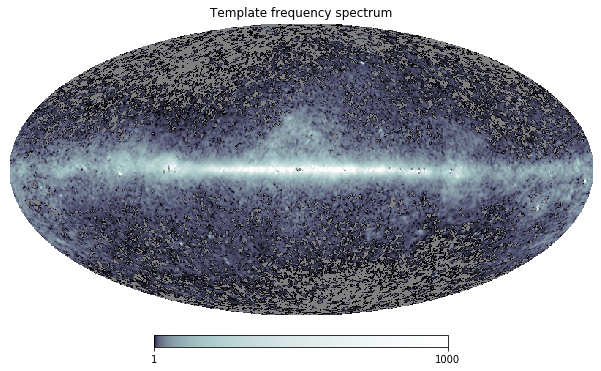

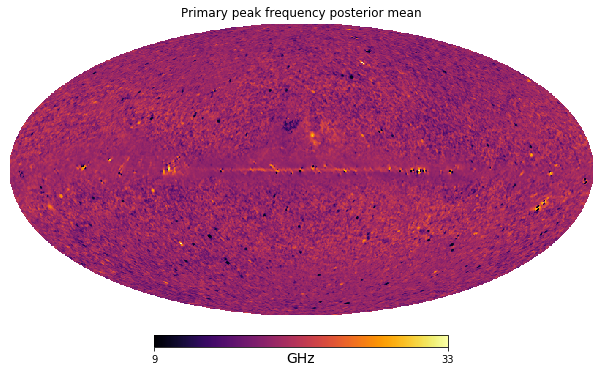

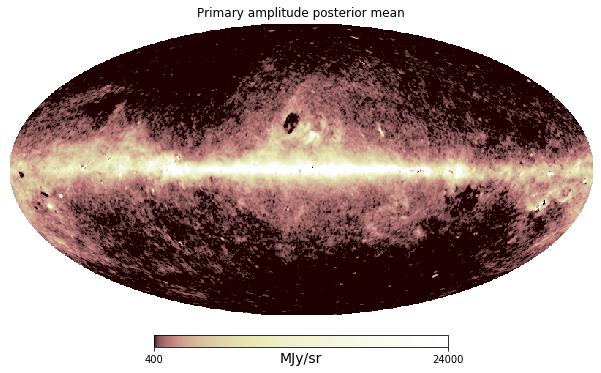

In [1]:
import healpy as hp
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import astropy.io
from astropy.io import fits
from astropy import units as u
from astropy.units import cds
from astropy import constants as const
import scipy
from scipy import stats
#    FREQUENCIES 

# template frequency spectrum
t = hp.read_map('COM_CompMap_AME-commander_0256_R2.00.fits', field=0, hdu=2)
hp.mollview(t, title = 'Template frequency spectrum', min = 1, max= 1000, norm='log', cmap = 'bone')

# peak frequency maximum
#o = hp.read_map('COM_CompMap_AME-commander_0256_R2.00.fits', field=3)
#p.mollview(o, title = 'Primary peak frequency posterior maximum', min=17, max = 23, cmap = 'bone')

# peak frequency mean
p = hp.read_map('COM_CompMap_AME-commander_0256_R2.00.fits', field=4)
hp.mollview(p, unit = 'GHz', title = 'Primary peak frequency posterior mean', min=9, max = 33, cmap = 'inferno')

# peak frequency rms
#q = hp.read_map('COM_CompMap_AME-commander_0256_R2.00.fits', field=5)
#hp.mollview(q, title = 'Primary peak frequency posterior rms', min=0, max = 3, cmap = 'Greys_r')

#    AMPLITUDES

# amplitude maximum for 22.8 GHz
#t = hp.read_map('COM_CompMap_AME-commander_0256_R2.00.fits', field=0)
#hp.mollview(t, unit='K_rj @ 22.8 GHz', title = 'Primary amplitude posterior maximum', min = 1, max= 6000, norm='log', cmap = 'pink', badcolor='black')

# amplitude mean for 22.8 GHz in MJy/sr
m = hp.read_map('COM_CompMap_AME-commander_0256_R2.00.fits', field=1, hdu=1)
m_K = m*u.K*(2*(p*u.GHz)**2*const.k_B)/(const.c**2*cds.sr)
m_J = (m_K).to(cds.MJy/cds.sr)
hp.mollview(m_J, unit='MJy/sr', title = 'Primary amplitude posterior mean', min=400, max=24000, norm='log', cmap = 'pink')

# amplitude maximum for 33.35 GHz
#u = hp.read_map('COM_CompMap_AME-commander_0256_R2.00.fits', field=0, hdu=2)
#hp.mollview(u,  unit='K_rj @ 33.35 GHz', title = 'Primary amplitude posterior maximum', min = 1, max= 6000, norm='log', cmap = 'pink', badcolor='black')

# amplitude mean for 33.35 GHz
#v = hp.read_map('COM_CompMap_AME-commander_0256_R2.00.fits', field=1, hdu=2)
#hp.mollview(v,  unit='K_rj @ 33.35 GHz', title = 'Primary amplitude posterior mean', min = 3, max= 10000, norm='log', cmap = 'pink', badcolor='black')

#plotting ratio between maximums at 22.8 and 33.35 GHz
#x= t/u
#hp.mollview(x, title = 'Ratio of Amplitude  at 22.8 GHz to 33.35 GHz', max = 50, cmap='pink')

#plotting ratio between means at 22.8 and 33.35 GHz
#y = m/v
#hp.mollview(y, title = 'Ratio of Amplitude  at 22.8 GHz to 33.35 GHz', min=1, max = 150, norm='log', cmap='pink')

# amplitude rms
#n = hp.read_map('COM_CompMap_AME-commander_0256_R2.00.fits', field=2)
#hp.mollview(n, title = 'Primary amplitude posterior rms', min=0, max=20, cmap = 'gray')


In [3]:
# map of CNM fraction error
#t = hp.read_map('fcnm_err_hpx.fits')
#hp.mollview(t, title = 'f_CNM error', min=0.012, max=0.12 , cmap='pink', badcolor='black')

NSIDE = 1024
ORDERING = RING in fits file
INDXSCHM = IMPLICIT


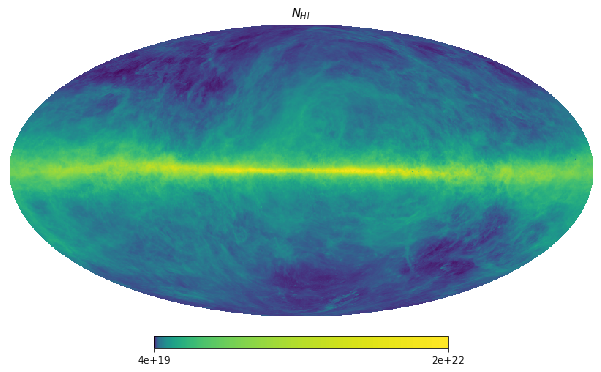

In [2]:
# map of HI  
t = hp.read_map('mom0_-90_90_1024.hpx.fits')
hp.mollview(t, title = r'$N_{HI}$', min = 4e19, max = 2e22, norm='log')

In [4]:
def change_coord(m, coord):
    """ Change coordinates of a HEALPIX map

    Parameters
    ----------
    m : map or array of maps
      map(s) to be rotated
    coord : sequence of two character
      First character is the coordinate system of m, second character
      is the coordinate system of the output map. As in HEALPIX, allowed
      coordinate systems are 'G' (galactic), 'E' (ecliptic) or 'C' (equatorial)

    Example
    -------
    The following rotate m from galactic to equatorial coordinates.
    Notice that m can contain both temperature and polarization.
    >>>> change_coord(m, ['G', 'C'])
    """
    # Basic HEALPix parameters
    npix = m.shape[-1]
    nside = hp.npix2nside(npix)
    ang = hp.pix2ang(nside, np.arange(npix))

    # Select the coordinate transformation
    rot = hp.Rotator(coord=reversed(coord))

    # Convert the coordinates
    new_ang = rot(*ang)
    new_pix = hp.ang2pix(nside, *new_ang)

    return m[..., new_pix]

NSIDE = 1024
ORDERING = RING in fits file
INDXSCHM = IMPLICIT
NSIDE = 1024
ORDERING = RING in fits file
INDXSCHM = IMPLICIT
ModeResult(mode=array([0.01270024]), count=array([2543865.]))


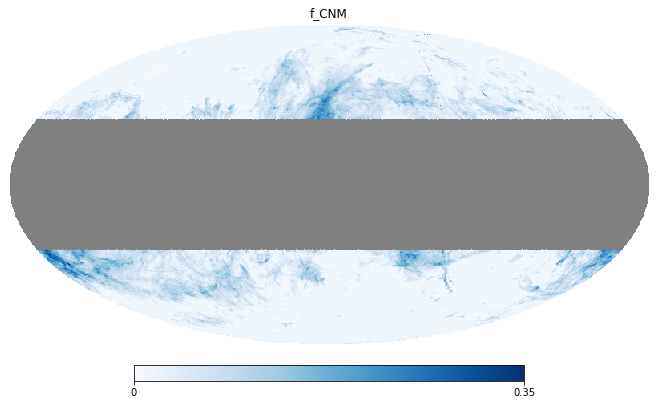

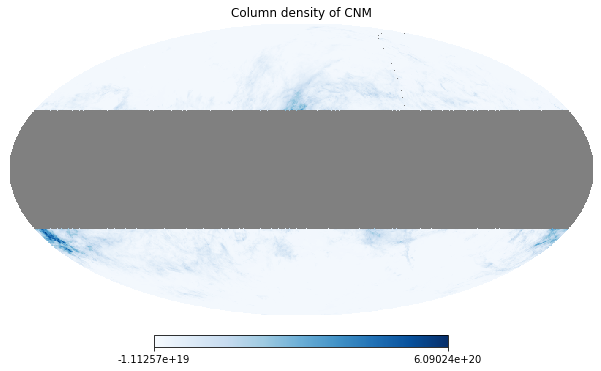

In [6]:
# map of CNM fraction 
fCNMmap, map1 = plt.subplots(figsize=(14,7))
f = hp.read_map('fcnm_hi4pi_hpx.fits') #reads map
f_gal = change_coord(f, 'CG') #converts to galactic coords
plt.axes(map1)
hp.mollview(f_gal, title = 'f_CNM', hold=True, min=0 , max=0.35, cmap='Blues') #maps it 

#map of CNM column density
H = hp.read_map('mom0_-90_90_1024.hpx.fits') #reads map of column density of H
N_CNM = f_gal * H #gives an array detailing a map of column density for CNM
hp.mollview(N_CNM, title = 'Column density of CNM', cmap = 'Blues') #maps it , min=3e+19, max = 5e+20, norm='log',

print(scipy.stats.mode(f, axis=None, nan_policy = 'omit'))

fCNMmap.savefig('fCNM_CNN.png')